In [26]:
import torch
import torchvision
import torchvision.transforms as transforms

In [73]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize( (0.5, 0.5, 0.5), (0.5, 0.5, 0.5) )])

In [74]:
download_path = "../prototype/pytorch_prototype/data"

trainset = torchvision.datasets.CIFAR10(
    root=download_path,
    train=True,
    download=True,
    transform=transform)

testset = torchvision.datasets.CIFAR10(
    root=download_path,
    train=False,
    download=True,
    transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [75]:
import random

# 複数クラスラベルのデータセットから指定クラスラベルの1データセットを取得
def get_one_label_data(class_label, dataset):
    new_data = []
    for data in dataset:
        label = data[1]
        if label == class_label:
            new_data.append(data)
    return new_data

# 複数クラスラベルのデータセットから指定クラスラベルのtrain, testデータセットを取得
def get_one_label_dataset(class_label, train, test):
    train = get_one_label_data(class_label, train)
    test = get_one_label_data(class_label, test)
    return train, test

# 1データセットのラベルを指定のラベルに変更
def change_label_data(new_label, dataset):
    new_data = []
    for data in dataset:
        new_data.append((data[0], new_label))
    return new_data

# train, testデータセットのラベルを指定のラベルに変更
def change_label_dataset(new_label, train, test):
    train = change_label_data(new_label, train)
    test = change_label_data(new_label, test)
    return train, test

# 指定データ数分のtrainデータをランダムに取得
# data_n: 1クラスのデータ数
def choice_train_at_random(data_n, train):
    train = random.sample(train, data_n)
    return train

# 指定クラスラベルリストのtrain, testデータセットを取得
def get_specific_label_dataset(class_label_list, train, test, data_n=None):
    new_train = []
    new_test = []
    for i, label in enumerate(class_label_list):
        got_train, got_test = get_one_label_dataset(label, train, test)
        got_train, got_test = change_label_dataset(i, got_train, got_test)
        if data_n != None:
            got_train = choice_train_at_random(data_n, got_train)
        new_train += got_train
        new_test += got_test
    return new_train, new_test

In [77]:
class_label_list = [1,2,8]
new_train, new_test = get_specific_label_dataset(class_label_list, trainset, testset)

In [79]:
print(len(new_train))
print(len(new_test))

15000
3000


In [80]:
batch_size = 128

trainloader = torch.utils.data.DataLoader(
    new_train,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2)

testloader = torch.utils.data.DataLoader(
    new_test,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2)

In [38]:
count = 0
for (inputs, labels) in trainloader:
    print(inputs.size())
    if count == 1:
        break
    count += 1

torch.Size([128, 3, 32, 32])
torch.Size([22, 3, 32, 32])


In [44]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

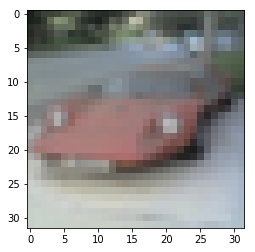

In [45]:
images = new_train[1][0]
imshow(torchvision.utils.make_grid(images))

In [22]:
from test_assets.model import pytorch_cifar10
param_path = "./test_assets/learned_model/v8.pth"
param = torch.load(param_path)
model = pytorch_cifar10.LeNet(3)
model.load_state_dict(param)

<All keys matched successfully>

In [39]:
output = model(inputs)

In [41]:
output.size()

torch.Size([22, 3])

In [43]:
inputs.size()

torch.Size([22, 3, 32, 32])

In [56]:
trainloader.dataset[0][0].size()

torch.Size([3, 32, 32])

In [57]:
output

tensor([[ -6.1358,   9.3961,  -3.1190],
        [ -0.8665,   5.6365,  -4.3302],
        [ -5.1286,   9.2466,  -3.2125],
        [ 15.8444, -10.2945,  -5.4801],
        [  9.4591,  -7.7053,  -1.3746],
        [ -0.2546,   6.6451,  -5.9619],
        [  2.0853,   3.4368,  -5.6710],
        [  3.9015,  -6.0273,   2.3281],
        [ -0.9257,  -5.9043,   7.2628],
        [  5.2608,  -7.9711,   2.4726],
        [  2.2490,   1.2676,  -3.0019],
        [ -2.1861,   5.1227,  -2.2795],
        [  5.0896,  -1.7767,  -3.6621],
        [  6.2192,  -7.8174,   1.4155],
        [ -4.0579,  -0.6717,   5.4351],
        [  4.1948,  -1.8043,  -2.1892],
        [ -1.7740,  -3.0505,   5.0578],
        [ 15.0099,  -9.2992,  -5.1931],
        [  7.4693,  -3.6060,  -4.7384],
        [ -1.3036,   2.3778,  -1.0075],
        [ -6.1945,  10.5967,  -3.4251],
        [  4.1784,  -5.5362,   1.3535]], grad_fn=<AddmmBackward>)

In [61]:
_, p = torch.max(output,1)

In [62]:
p

tensor([1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0])

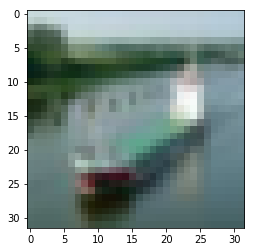

In [69]:
imshow(torchvision.utils.make_grid(inputs[8]))

In [72]:
trainloader.dataset

[(tensor([[[ 0.6392,  0.4431,  0.5529,  ...,  0.7490,  0.7098,  0.7647],
           [ 0.7333,  0.4824,  0.5294,  ...,  0.8039,  0.6549,  0.7255],
           [ 0.5451,  0.4353,  0.6549,  ...,  0.5922,  0.3882,  0.4196],
           ...,
           [ 0.6157,  0.6078,  0.6235,  ..., -0.3490, -0.3569, -0.1451],
           [ 0.5765,  0.5686,  0.5922,  ..., -0.5294,  0.0275,  0.5294],
           [ 0.5765,  0.5686,  0.5922,  ..., -0.0745,  0.4196,  0.5843]],
  
          [[ 0.7804,  0.5843,  0.6863,  ...,  0.8510,  0.8275,  0.8510],
           [ 0.8510,  0.6000,  0.6392,  ...,  0.8824,  0.7333,  0.7882],
           [ 0.6392,  0.5216,  0.7412,  ...,  0.6784,  0.4588,  0.4980],
           ...,
           [ 0.5294,  0.5216,  0.5373,  ..., -0.5922, -0.5137, -0.2392],
           [ 0.4902,  0.4824,  0.5137,  ..., -0.6784, -0.1294,  0.3725],
           [ 0.4824,  0.4824,  0.5059,  ..., -0.0824,  0.3804,  0.5294]],
  
          [[ 0.9529,  0.7490,  0.8510,  ...,  0.9843,  0.9843,  0.9686],
           

In [97]:
inputs = trainloader.__iter__()._next_data()

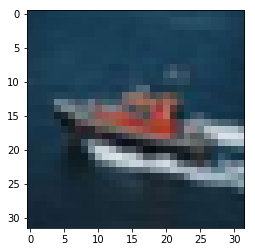

In [107]:
imshow(torchvision.utils.make_grid(inputs[0][5]))

In [104]:
inputs

[tensor([[[[ 0.5686,  0.5137,  0.5137,  ...,  0.3333,  0.2471,  0.2784],
           [ 0.7725,  0.7255,  0.7176,  ...,  0.5137,  0.4431,  0.4980],
           [ 0.7569,  0.7412,  0.7412,  ...,  0.6157,  0.6157,  0.5686],
           ...,
           [ 0.0118,  0.0118, -0.0039,  ..., -0.1686, -0.1294, -0.1608],
           [ 0.0667,  0.0902,  0.0588,  ..., -0.1843, -0.1686, -0.2078],
           [ 0.0431,  0.0353,  0.0118,  ..., -0.1451, -0.1294, -0.2000]],
 
          [[ 0.6392,  0.5922,  0.5843,  ...,  0.4039,  0.3176,  0.3412],
           [ 0.8588,  0.8039,  0.7961,  ...,  0.5686,  0.4980,  0.5529],
           [ 0.8431,  0.8275,  0.8275,  ...,  0.6549,  0.6471,  0.6078],
           ...,
           [ 0.0510,  0.0510,  0.0353,  ..., -0.1608, -0.1216, -0.1529],
           [ 0.0980,  0.1137,  0.0902,  ..., -0.1765, -0.1686, -0.2078],
           [ 0.0588,  0.0510,  0.0275,  ..., -0.1451, -0.1294, -0.2000]],
 
          [[ 0.7490,  0.7020,  0.7020,  ...,  0.4667,  0.3804,  0.4118],
           [ 